# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
%matplotlib inline
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

# Loading the data

In [2]:
data = pd.read_csv('/Users/ewa_anna_szyszka/Desktop/testujemy.csv')
data.head()

,lat,long,district,altura_tot,diametro
0,-34.645015,-58.477564,Parque Avellaneda,6.0,35.0
1,-34.645047,-58.477559,Parque Avellaneda,6.0,35.0
2,-34.645091,-58.477551,Parque Avellaneda,6.0,35.0
3,-34.644567,-58.478129,Parque Avellaneda,17.0,50.0
4,-34.644598,-58.478121,Parque Avellaneda,17.0,50.0


# Investigating the data

Below I plot the contour map of Buenos Aires using the tree coordinates from the dataset. 
The resulting plot is not Noth oriented, it is solely a shape map that aims at checking whether we do not have any outliers in the dataset - trees that are not within Buenos Aires region.

([], <a list of 0 Text yticklabel objects>)

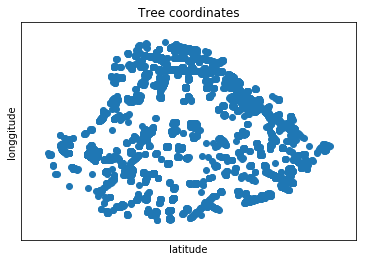

In [3]:
plt.scatter((data["lat"]), (data['long']))
plt.xlabel("latitude")
plt.ylabel("longgitude")
plt.title("Tree coordinates")
plt.xticks(np.arange(-34.525, 0.1, -34.700))
plt.yticks(np.arange(-58.525, 0.1, -58.300))

Looking at the image below showing a North oriented contour map of Bueos Aires and its neiborghoods and comparing it with the shape above we can conclude that we do not have any datapoints outside Buenos Aires, as all the datapoints plotted are forming the contour of Buenos Aires

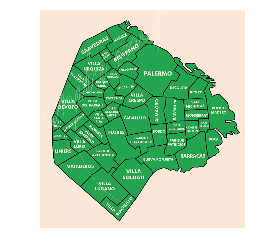

In [4]:
plt.axis("off")
plt.imshow(mpimg.imread("buenos.jpg"))

Next, I would once again re-plot the scatterplot above, this time taking into consideration the unique neiborghoods from which the datapoints were collected. It is worth noticing that the dataset includes tree samples from 36 neiborghoods, whereas the city of Buenos Aires has 48 neiborghoods in total.

In [5]:
print ('The number of unique districts in the dataset {}').format(len(data['district '].unique()))
print (" ")
print data['district '].unique()

The number of unique districts in the dataset 36
 
['Parque Avellaneda' 'Villa Lugano' 'Villa Soldati' 'Mataderos' 'Liniers'
 'Villa Urquiza' 'Saavedra' 'Belgrano' 'Puerto Madero' 'La Boca'
 'San Telmo' 'Palermo' 'Recoleta' 'Paternal' 'Barracas' 'Constitucion'
 'Parque Patricios' 'Caballito' 'Chacabuco Park' 'Nunez' 'Retiro'
 'Villa Pueyrredon' 'Monserrat' 'San Nicolas' 'Chacarita' 'Agronomia'
 'Nueva Pompeya' 'Flores' nan 'Monte Castro' 'Villa Devoto'
 'Villa del Parque' 'Villa General Mitre' 'Colegiales' 'Villa Crespo'
 'Villa Riachuelo']


Below I create a visualization for which the user can select which regions one wants to highlight. The resulting plot would have all trees in the dataset plotted, but the trees in selected regions would be plotted in red. It is possible to select multiple districts at one time. In order to do so one needs to type any of the regions listed in the unique array below.

Type the name of the districts that you want highlighteds


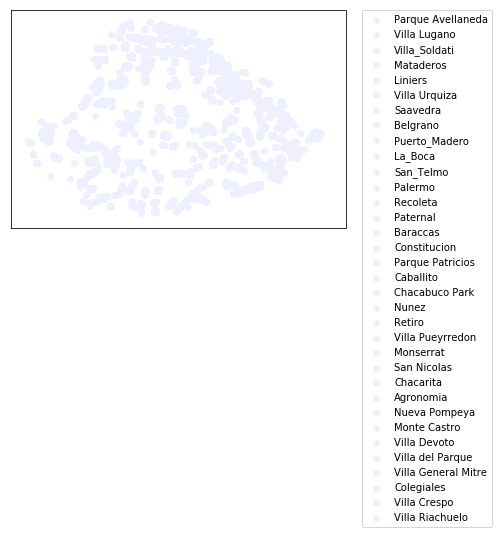

In [6]:
unique = ['Parque_Avellaneda', 'Villa_Lugano', 'Villa_Soldati', 'Mataderos',
       'Liniers', 'Villa_Urquiza', 'Saavedra', 'Belgrano', 'Puerto_Madero',
       'La_Boca', 'San_Telmo', 'Palermo', 'Recoleta', 'Paternal',
       'Barracas', 'Constitucion', 'Parque_Patricios', 'Caballito',
       'Chacabuco_Park', 'Nunez', 'Retiro', 'Villa_Pueyrredon',
       'Monserrat', 'San_Nicolas', 'Chacarita', 'Agronomia',
       'Nueva_Pompeya', 'Flores', 'Monte_Castro', 'Villa_Devoto',
       'Villa_del_Parque', 'Villa_General_Mitre', 'Colegiales',
       'Villa_Crespo', 'Villa_Riachuelo']

raw = raw_input("Type the name of the districts that you want highlighted")
wor = raw.split()

slowo = []
for i in unique:
    if i in wor:
        print i
        slowo.append(i)
        
labels = { 'Palermo':'#eeefff','Colegiales':'#eeefff','Villa_del_Parque':'#eeefff','Villa_Lugano':'#eeefff',
          'La_Boca':'#eeefff','Nunez':'#eeefff','Agronomia':'#eeefff','Caballito':'#eeefff','Paternal':'#eeefff',
          'Nueva_Pompeya':'#eeefff','Villa_Soldati':'#eeefff', 'Mataderos':'#eeefff',
       'Liniers':'#eeefff', 'Villa_Urquiza':'#eeefff', 'Saavedra':'#eeefff', 'Belgrano':'#eeefff', 'Puerto_Madero':'#eeefff',
        'San_Telmo':'#eeefff',  'Recoleta':'#eeefff', 'Baraccas':'#eeefff', 'Constitucion':'#eeefff', 'Parque_Patricios':'#eeefff', 
       'Chacabuco_Park':'#eeefff',  'Retiro':'#eeefff', 'Villa_Pueyrredon':'#eeefff',
       'Monserrat':'#eeefff', 'San_Nicolas':'#eeefff', 'Chacarita':'#eeefff', 
        'Flores':'#eeefff', 'Monte_Castro':'#eeefff', 'Villa_Devoto':'#eeefff','Villa_General_Mitre':'#eeefff', 
       'Villa_Crespo':'#eeefff', 'Villa_Riachuelo':'#eeefff', 'Parque_Avellaneda':'#eeefff'}

#Change the colors of the selected districts
for i in range(len(slowo)):
    labels.update({slowo[i]: '#C21D42'})
     

a = data.loc[data['district '] == 'Parque Avellaneda']
b = data.loc[data['district '] == 'Villa Lugano']
c = data.loc[data['district '] == 'Villa Soldati']
d = data.loc[data['district '] == 'Mataderos']
e = data.loc[data['district '] == 'Liniers']
f = data.loc[data['district '] == 'Villa Urquiza']
g = data.loc[data['district '] == 'Saavedra']
h = data.loc[data['district '] == 'Belgrano']
i = data.loc[data['district '] == 'Puerto Madero']
j = data.loc[data['district '] == 'La Boca']
k = data.loc[data['district '] == 'San Telmo']
l = data.loc[data['district '] == 'Palermo']
m = data.loc[data['district '] == 'Recoleta']
n = data.loc[data['district '] == 'Paternal']
o = data.loc[data['district '] == 'Baraccas']
p = data.loc[data['district '] == 'Constitucion']
q = data.loc[data['district '] == 'Parque Patricios']
r = data.loc[data['district '] == 'Caballito']
s = data.loc[data['district '] == 'Chacabuco Park']
t = data.loc[data['district '] == 'Nunez']
u = data.loc[data['district '] == 'Retiro']
v = data.loc[data['district '] == 'Villa Pueyrredon']
w = data.loc[data['district '] == 'Monserrat']
x = data.loc[data['district '] == 'San Nicolas']
y = data.loc[data['district '] == 'Chacarita']
z = data.loc[data['district '] == 'Agronomia']
aa = data.loc[data['district '] == 'Nueva Pompeya']
cc = data.loc[data['district '] == 'Monte Castro']
dd = data.loc[data['district '] == 'Villa Devoto']
ee = data.loc[data['district '] == 'Villa del Parque']
ff = data.loc[data['district '] == 'Villa General Mitre']
gg = data.loc[data['district '] == 'Colegiales']
hh = data.loc[data['district '] == 'Villa Crespo']
ii = data.loc[data['district '] == 'Villa Riachuelo']


plt.scatter(a["lat"], a['long'],label='Parque Avellaneda', color = labels.get('Parque_Avellaneda'))
plt.scatter(b["lat"], b['long'],label='Villa Lugano', color = labels.get('Villa_Lugano'))
plt.scatter(c["lat"], c['long'],label='Villa_Soldati', color = labels.get('Villa_Soldati'))
plt.scatter(d["lat"], d['long'],label='Mataderos', color = labels.get('Mataderos'))
plt.scatter(e["lat"], e['long'],label='Liniers', color = labels.get('Liniers'))
plt.scatter(f["lat"], f['long'],label='Villa Urquiza', color = labels.get('Villa_Urquiza'))
plt.scatter(g["lat"], g['long'],label='Saavedra', color = labels.get('Saavedra'))
plt.scatter(h["lat"], h['long'],label='Belgrano', color = labels.get('Belgrano'))
plt.scatter(i["lat"], i['long'],label='Puerto_Madero', color = labels.get('Puerto_Madero'))
plt.scatter(j["lat"], j['long'],label='La_Boca', color = labels.get('La_Boca'))
plt.scatter(k["lat"], k['long'],label='San_Telmo', color = labels.get('San_Telmo'))
plt.scatter(l["lat"], l['long'],label='Palermo', color = labels.get('Palermo'))
plt.scatter(m["lat"], m['long'],label='Recoleta', color = labels.get('Recoleta'))
plt.scatter(n["lat"], n['long'],label='Paternal', color = labels.get('Paternal'))
plt.scatter(o["lat"], o['long'],label='Baraccas', color = labels.get('Baraccas'))
plt.scatter(p["lat"], p['long'],label='Constitucion', color = labels.get('Constitucion'))
plt.scatter(q["lat"], q['long'],label='Parque Patricios', color = labels.get('Parque_Patricios'))
plt.scatter(r["lat"], r['long'],label='Caballito', color = labels.get('Caballito'))
plt.scatter(s["lat"], s['long'],label='Chacabuco Park', color = labels.get('Chacabuco_Park'))
plt.scatter(t["lat"], t['long'],label='Nunez', color = labels.get('Nunez'))
plt.scatter(u["lat"], u['long'],label='Retiro', color = labels.get('Retiro'))
plt.scatter(v["lat"], v['long'],label='Villa Pueyrredon', color = labels.get('Villa_Pueyrredon'))
plt.scatter(w["lat"], w['long'],label='Monserrat', color = labels.get('Monserrat'))
plt.scatter(x["lat"], x['long'],label='San Nicolas', color = labels.get('San_Nicolas'))
plt.scatter(y["lat"], y['long'],label='Chacarita', color = labels.get('Chacarita'))
plt.scatter(z["lat"], z['long'],label='Agronomia', color = labels.get('Agronomia'))
plt.scatter(aa["lat"], aa['long'],label='Nueva Pompeya', color = labels.get('Nueva_Pompeya'))
plt.scatter(cc["lat"], cc['long'],label='Monte Castro', color = labels.get('Monte_Castro'))
plt.scatter(dd["lat"], dd['long'],label='Villa Devoto', color = labels.get('Villa_Devoto'))
plt.scatter(ee["lat"], ee['long'],label='Villa del Parque', color = labels.get('Villa_del_Parque'))
plt.scatter(ff["lat"], ff['long'],label='Villa General Mitre', color = labels.get('Villa_General_Mitre'))
plt.scatter(gg["lat"], gg['long'],label='Colegiales', color = labels.get('Colegiales'))
plt.scatter(hh["lat"], hh['long'],label='Villa Crespo', color = labels.get('Villa_Crespo'))
plt.scatter(ii["lat"], ii['long'],label='Villa Riachuelo', color = labels.get('Villa_Riachuelo'))

plt.xticks(np.arange(-34.525, 0.1, -34.700))
plt.yticks(np.arange(-58.525, 0.1, -58.300))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Next, I will be inspecting the tree dimensions data across various districts and I would select few districts for the decision tree and the Support Vector Machine (SVM) models that I will implement in the next section. First, I noticed that the data for Mataderos and Recoleta are very distinct from each other, thus I tried my first SVM on this data. The next more complicated model with three classes I created on Villa Lugano, Belgrano and Recoleta data.

# Mataderos and Recoleta scatterplot

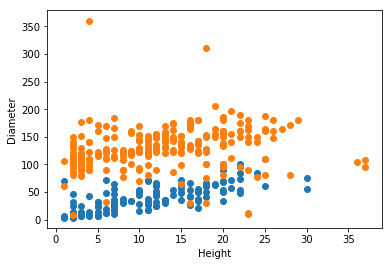

In [7]:
#__________________________________________
m = data.loc[data['district '] == 'Mataderos']
height_m = m['altura_tot']
diameter_m = m['diametro']

plt.scatter(height_m, diameter_m)
plt.xlabel("Height")
plt.ylabel("Diameter")

#__________________________________________
g = data.loc[data['district '] == 'Recoleta']
height_g = g['altura_tot']
diameter_g = g['diametro']

plt.scatter(height_g, diameter_g)
plt.xlabel("Height")
plt.ylabel("Diameter")

# Villa Lugano, Belgrano and Recoleta scatterplot

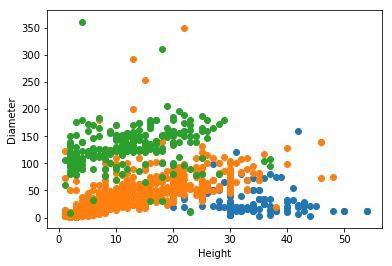

In [8]:
#__________________________________________
m = data.loc[data['district '] == 'Villa Lugano']
height_m = m['altura_tot']
diameter_m = m['diametro']

plt.scatter(height_m, diameter_m)
plt.xlabel("Height")
plt.ylabel("Diameter")

#__________________________________________
g = data.loc[data['district '] == 'Belgrano']
height_g = g['altura_tot']
diameter_g = g['diametro']

plt.scatter(height_g, diameter_g)
plt.xlabel("Height")
plt.ylabel("Diameter")

#__________________________________________
gf = data.loc[data['district '] == 'Recoleta']
height_gf = gf['altura_tot']
diameter_gf = gf['diametro']

plt.scatter(height_gf, diameter_gf)
plt.xlabel("Height")
plt.ylabel("Diameter")

# SVM with Linear Kernel (Mataderos and Recoleta)

In [9]:
Mataderos = data.loc[data['district '] == 'Mataderos']
Recoleta = data.loc[data['district '] == 'Recoleta']

#______________Mataderos______________

LABEL = Mataderos.iloc[:,2].values
LABEL.reshape((137,1))

DATA = Mataderos.iloc[:,3].values #height Mataderos
DATA.reshape((137,1))


DATA_b = Mataderos.iloc[:,4].values #diameter Mataderos 
DATA_b.reshape((137,1))

#______________Recoleta______________

LABEL_2 = Recoleta.iloc[:,2].values
LABEL_2.reshape((249,1))

DATA_2 = Recoleta.iloc[:,3].values #height Recoleta
DATA_2.reshape((249,1))

DATA_2_b = Recoleta.iloc[:,4].values #diameter Recoleta 
DATA_2_b.reshape((249,1))

#_______________one dataset____________

da = np.c_[DATA,DATA_b] #height, diameter of Mataderos next to each other 
ta = np.c_[LABEL] #label for Mataderos

da2 = np.c_[DATA_2,DATA_2_b] #height, diameter of Recoleta next to each other 
ta2 = np.c_[LABEL_2]  #label for Recoleta

#___________stacking things on top_________

HEY = np.concatenate((da, da2))  #height and diameter for the two classes 
LABS = np.concatenate((LABEL, LABEL_2)) #labels for the two classes 

In [10]:
#converting string categories into integers
numeric_labels = np.concatenate((LABEL,LABEL_2))
numeric_labels[numeric_labels == 'Mataderos'] = 1
numeric_labels[numeric_labels == 'Recoleta'] = 2

In [11]:
#doing the test train split 
X_train, X_test, y_train, y_test = train_test_split(HEY, numeric_labels, test_size = 0.20) 

In [12]:
y_train = np.asarray(y_train,dtype=np.float64)

In [13]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = svclassifier.predict(X_test)  
y_pred.astype(int)
y_test = np.array(y_test, dtype=float)

Below I displayed the confusion matrix alongside the report from the classification using SVM on Mataderos and Recoleta using a linear Kernel. In the report the category 1 is Mataderos and category 2 is Recoleta, the first column displays the precision for each category, meaning the ratio of true positives over all true positive and false positive guesses, the second column gives recall, which is the ratio of the true positive over the true positive and false negative guesses. The perfect score that we would want to arrive is 1, in this case our values for precision and recall are close to this value.

In [15]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred) )

[[20  0]
 [ 1 57]]
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98        20
         2.0       1.00      0.98      0.99        58

   micro avg       0.99      0.99      0.99        78
   macro avg       0.98      0.99      0.98        78
weighted avg       0.99      0.99      0.99        78



# Visualizing SVM with Linear Kernel (Mataderos and Recoleta)

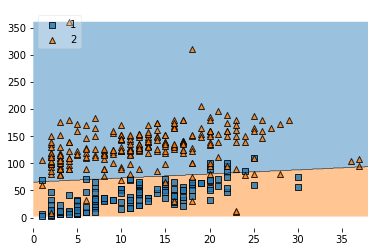

In [16]:
plot_decision_regions(HEY, numeric_labels.astype(np.integer), clf=svclassifier, legend=2)

# SVM with non-linear Kernel (Mataderos and Recoleta)

Next, from running the same data on a non-linear kernel, which in this case was a polynomial kernel of degree = 2 we can notice few things, the first one is that the recall and precision scores are on average better with the polynomial kernel, however we run into a problem of overfitting as the model fitts to closely to our data in this case. 

In [17]:
#doing the test train split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(HEY, numeric_labels, test_size = 0.20) 

In [18]:
svclassifier2 = SVC(kernel='poly', degree=2,gamma='auto')  
svclassifier2.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

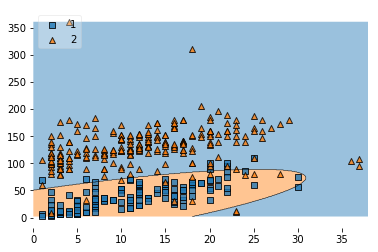

In [19]:
plot_decision_regions(HEY, numeric_labels.astype(np.integer), clf=svclassifier2, legend=2)

In [20]:
y_pred2 = svclassifier2.predict(X_test2)
y_pred2.astype(int)
y_test2 = np.array(y_test2, dtype=float)

In [21]:
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2) )

[[22  2]
 [ 4 50]]
              precision    recall  f1-score   support

         1.0       0.85      0.92      0.88        24
         2.0       0.96      0.93      0.94        54

   micro avg       0.92      0.92      0.92        78
   macro avg       0.90      0.92      0.91        78
weighted avg       0.93      0.92      0.92        78



# Ensemble methods (Mataderos and Recoleta)

I tested above how polynomial kernel and linear kernel SVM perform on our data above, the next step that I would take is to look at how on the same data the ensemble methods would perform. Currently, ensemble methods are the state of the art and are considered best performing as they combine multiple models for classification problems among other problems such as regression. The ensemble method that I would be looking at is random forest. 

In [ ]:
#Parts of the random forest code were inspired by: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/ 

In [24]:
#Test train split
X_train3, X_test3, y_train3, y_test3 = train_test_split(HEY, numeric_labels, test_size=0.2, random_state=0)

In [25]:
# Feature Scaling --> normalization of the data
sc = StandardScaler()  
X_train3 = sc.fit_transform(X_train3)  
X_test3 = sc.transform(X_test3)  

In [26]:
#Here I would be using 20 random trees 
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train3, y_train3)  
y_pred3 = regressor.predict(X_test3) 

In [27]:
y_pred3 = np.array(y_pred3, dtype=int)
y_test3 = np.array(y_test3, dtype=int)

In [28]:
print(confusion_matrix(y_test3,y_pred3))  
print(classification_report(y_test3,y_pred3))  
print(accuracy_score(y_test3, y_pred3))  

[[27  1]
 [ 1 49]]
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        28
           2       0.98      0.98      0.98        50

   micro avg       0.97      0.97      0.97        78
   macro avg       0.97      0.97      0.97        78
weighted avg       0.97      0.97      0.97        78

0.974358974359


# Visualizing ensemble methods (Mataderos and Recoleta)

In [29]:
#The visualization code inspired by: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    #ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

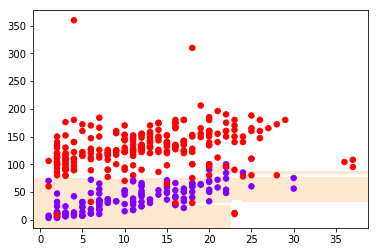

In [30]:
visualize_classifier(regressor, HEY, numeric_labels)

From the work done so far one can reach few conclusions. So to summarize what I have done so far was first I investigated the raw data and among all of the districts in Buenos Aires I have selected two that have trees that are different from each other. It is worth noticing that as we investigate the height and diameter of trees the trees located in districts closer to the ocean seem more similar to each other and the trees that are located more inland share similarities with each other. Next, after the pre-processing and initial investigation stage I have chosen two districts Mataderos and Recoleta and I investigated the data using Support Vector Machine with Linear and Polynomial kernels. For the Linear Kernel we noticed that on average it performs better than the polinomial kernel in terms of precision and recall. The Polynomial Kernel did overfit the data and the Random Forest had the best average performance, however this method is also prone to overfitting.

# SVM with Linear Kernel (Villa Lugano, Recoleta and Belgrano)

In [31]:
Villa_Lugano = data.loc[data['district '] == 'Villa Lugano']
Recoleta = data.loc[data['district '] == 'Recoleta']
Belgrano = data.loc[data['district '] == 'Belgrano']

#______________Villa_Lugano______________

LABEL = Villa_Lugano.iloc[:,2].values
LABEL.reshape((192,1))

DATA = Villa_Lugano.iloc[:,3].values #height Villa_Lugano
DATA.reshape((192,1))

DATA_b = Villa_Lugano.iloc[:,4].values #diameter Villa_Lugano
DATA_b.reshape((192,1))

#______________Recoleta______________

LABEL_2 = Recoleta.iloc[:,2].values
LABEL_2.reshape((249,1))

DATA_2 = Recoleta.iloc[:,3].values #height Recoleta
DATA_2.reshape((249,1))

DATA_2_b = Recoleta.iloc[:,4].values #diameter Recoleta 
DATA_2_b.reshape((249,1))


#______________Belgrano______________

LABEL_3 = Belgrano.iloc[:,2].values
LABEL_3.reshape((717,1))

DATA_3 = Belgrano.iloc[:,3].values #height Belgrano
DATA_3.reshape((717,1))

DATA_3_b = Belgrano.iloc[:,4].values #diameter Belgrano 
DATA_3_b.reshape((717,1))


#_______________one dataset____________

da = np.c_[DATA,DATA_b] #height, diameter of Villa Lugano next to each other 
ta = np.c_[LABEL] #label for Villa Lugano

da2 = np.c_[DATA_2,DATA_2_b] #height, diameter of Recoleta next to each other 
ta2 = np.c_[LABEL_2]  #label for Recoleta

da3 = np.c_[DATA_3,DATA_3_b] #height, diameter of Belgrano next to each other 
ta3 = np.c_[LABEL_3]  #label for Belgrano

#___________stacking things on top_________

HEY = np.concatenate((da, da2,da3))  #height and diameter for the two classes 
LABS = np.concatenate((LABEL, LABEL_2,LABEL_3)) #labels for the two classes 

In [32]:
numeric_labels = np.concatenate((LABEL,LABEL_2,LABEL_3))
numeric_labels[numeric_labels == 'Villa Lugano'] = 1
numeric_labels[numeric_labels == 'Recoleta'] = 2
numeric_labels[numeric_labels == 'Belgrano'] = 3
print numeric_labels

[1 1 1 ..., 3 3 3]


In [33]:
#doing the test train split 
X_train, X_test, y_train, y_test = train_test_split(HEY, numeric_labels, test_size = 0.20) 

In [34]:
y_train = np.asarray(y_train,dtype=np.float64)

In [35]:
svcclassifier = SVC(kernel='linear')
svcclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = svcclassifier.predict(X_test)
y_pred.astype(int)
y_test = np.array(y_test,dtype=float)

In [37]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred) )

[[ 30   0  11]
 [  0  41   4]
 [  8   3 135]]
              precision    recall  f1-score   support

         1.0       0.79      0.73      0.76        41
         2.0       0.93      0.91      0.92        45
         3.0       0.90      0.92      0.91       146

   micro avg       0.89      0.89      0.89       232
   macro avg       0.87      0.86      0.86       232
weighted avg       0.89      0.89      0.89       232



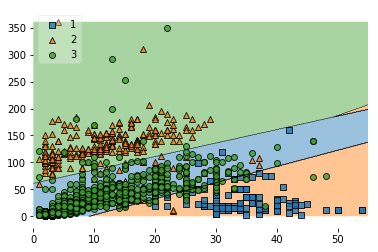

In [38]:
plot_decision_regions(HEY, numeric_labels.astype(np.integer), clf=svcclassifier, legend=2)

# SVM with non-linear Kernel (Villa Lugano, Belgrano and Recoleta)

In [39]:
svclassifier = SVC(kernel='poly', degree=2,gamma='auto')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_pred2 = svclassifier.predict(X_test2)
y_pred2.astype(int)
y_test2 = np.array(y_test2, dtype=float)

In [42]:
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2) )

[[ 1  2 21]
 [ 0 48  6]
 [ 0  0  0]]
              precision    recall  f1-score   support

         1.0       1.00      0.04      0.08        24
         2.0       0.96      0.89      0.92        54
         3.0       0.00      0.00      0.00         0

   micro avg       0.63      0.63      0.63        78
   macro avg       0.65      0.31      0.33        78
weighted avg       0.97      0.63      0.66        78



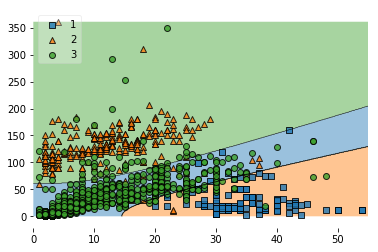

In [43]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

plot_decision_regions(HEY, numeric_labels.astype(np.integer), clf=svclassifier, legend=2)

# Ensemble methods (Villa Lugano, Belgrano and Recoleta)

In [44]:
#Test train split
X_train3, X_test3, y_train3, y_test3 = train_test_split(HEY, numeric_labels, test_size=0.2, random_state=0)

In [45]:
# Feature Scaling --> normalization of the data
sc = StandardScaler()  
X_train3 = sc.fit_transform(X_train3)  
X_test3 = sc.transform(X_test3) 

In [46]:
#Here I would be using 20 random trees 
regressor = RandomForestRegressor(n_estimators=500, random_state=0)  
regressor.fit(X_train3, y_train3)  
y_pred3 = regressor.predict(X_test3) 

In [47]:
y_pred3 = np.array(y_pred3, dtype=int)
y_test3 = np.array(y_test3, dtype=int)

In [48]:
print(confusion_matrix(y_test3,y_pred3))  
print(classification_report(y_test3,y_pred3))  
print(accuracy_score(y_test3, y_pred3))  

[[ 29   1   0]
 [  0  39   1]
 [  7  51 104]]
              precision    recall  f1-score   support

           1       0.81      0.97      0.88        30
           2       0.43      0.97      0.60        40
           3       0.99      0.64      0.78       162

   micro avg       0.74      0.74      0.74       232
   macro avg       0.74      0.86      0.75       232
weighted avg       0.87      0.74      0.76       232

0.741379310345


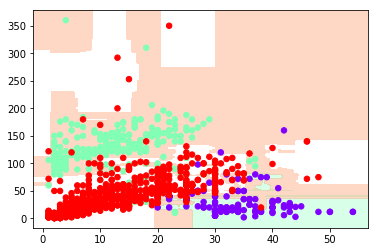

In [49]:
visualize_classifier(regressor, HEY, numeric_labels)